In [266]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [267]:
import numpy as np

In [371]:
knots_x_values = np.concatenate([np.array([-10]), np.linspace(-5, 5, 20), np.array([10])])
knots_y_values = np.sort(np.concatenate([np.array([-5]), np.random.uniform(-5, 5, 20), np.array([5])]))

In [372]:
knots_x_values

array([-10.        ,  -5.        ,  -4.47368421,  -3.94736842,
        -3.42105263,  -2.89473684,  -2.36842105,  -1.84210526,
        -1.31578947,  -0.78947368,  -0.26315789,   0.26315789,
         0.78947368,   1.31578947,   1.84210526,   2.36842105,
         2.89473684,   3.42105263,   3.94736842,   4.47368421,
         5.        ,  10.        ])

In [373]:
from scipy.special import expit, logit
from scipy.interpolate import interp1d
from sklearn.linear_model import LogisticRegression 

In [374]:
intp = interp1d(knots_x_values, knots_y_values)

In [375]:
x_points = np.random.uniform(knots_x_values.min(), knots_x_values.max(), 1000000)

In [376]:
y_points = intp(x_points)

In [377]:
# y_points

In [378]:
p_points = expit(y_points)

In [379]:
label_points = np.random.binomial(n=1, p=p_points)

In [380]:
from splinator.estimators import LinearSplineLogisticRegression

In [381]:
lr = LogisticRegression()                                                       
lr.fit( x_points.reshape( -1, 1 ), label_points )

LogisticRegression()

In [382]:
knots_x_values

array([-10.        ,  -5.        ,  -4.47368421,  -3.94736842,
        -3.42105263,  -2.89473684,  -2.36842105,  -1.84210526,
        -1.31578947,  -0.78947368,  -0.26315789,   0.26315789,
         0.78947368,   1.31578947,   1.84210526,   2.36842105,
         2.89473684,   3.42105263,   3.94736842,   4.47368421,
         5.        ,  10.        ])

In [383]:
lslr = LinearSplineLogisticRegression(
        n_knots=None,
        knots=np.linspace(-10, 10, 20),
        monotonicity="increasing", 
        minimizer_options={'disp': True}, 
        method='SLSQP', 
        C=10,
        two_stage_fitting_initial_size=2000
    )
lslr.fit( x_points.reshape( -1, 1 ), label_points )

Optimization terminated successfully    (Exit mode 0)
            Current function value: 253.44986252407554
            Iterations: 51
            Function evaluations: 77
            Gradient evaluations: 51
Optimization terminated successfully    (Exit mode 0)
            Current function value: 132880.52862751452
            Iterations: 53
            Function evaluations: 178
            Gradient evaluations: 49


LinearSplineLogisticRegression(C=10,
                               knots=array([-10.        ,  -8.94736842,  -7.89473684,  -6.84210526,
        -5.78947368,  -4.73684211,  -3.68421053,  -2.63157895,
        -1.57894737,  -0.52631579,   0.52631579,   1.57894737,
         2.63157895,   3.68421053,   4.73684211,   5.78947368,
         6.84210526,   7.89473684,   8.94736842,  10.        ]),
                               minimizer_options={'disp': True},
                               monotonicity='increasing', n_knots=None,
                               two_stage_fitting_initial_size=2000)

In [384]:
%matplotlib inline

from matplotlib import pyplot as plt

In [385]:
import pandas as pd

In [386]:
df = pd.DataFrame({
        'x':  x_points,
        'lslr_y': logit(lslr.predict(x_points.reshape( -1, 1 ))),
        'y_points': y_points,
        'lr_y': logit(lr.predict_proba(x_points.reshape( -1, 1 ))[:, 1]),
    })

In [387]:
lslr.predict(x_points.reshape( -1, 1 )).min()

0.007714387202085897

In [388]:
df.sort_values('x', inplace=True)

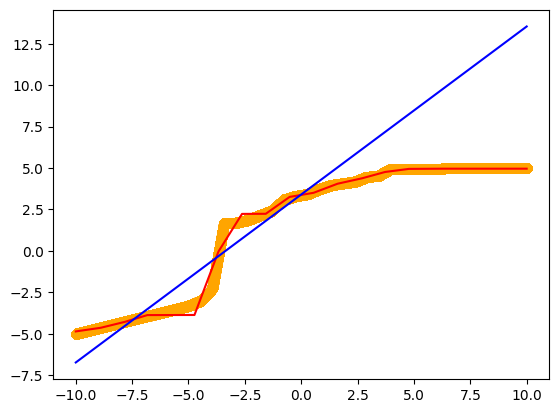

In [389]:
plt.plot(df['x'], df['lslr_y'], color='red')
plt.scatter(df['x'], df['y_points'], color='orange')
plt.plot(df['x'], df['lr_y'], color='blue')